In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
file_url = "https://drive.google.com/uc?id=1wn_LxAYKiwtlS3du0LLJQ87pWUhQRPds"

In [61]:
#Прочитайте csv файл
df = pd.read_csv(file_url)
df

,Name,Author,User Rating,Reviews,Price,Year,Genre
0,10-Day Green Smoothie Cleanse,JJ Smith,4.7,17350,8,2016,Non Fiction
1,11/22/63: A Novel,Stephen King,4.6,2052,22,2011,Fiction
2,12 Rules for Life: An Antidote to Chaos,Jordan B. Peterson,4.7,18979,15,2018,Non Fiction
3,1984 (Signet Classics),George Orwell,4.7,21424,6,2017,Fiction
4,"5,000 Awesome Facts (About Everything!) (Natio...",National Geographic Kids,4.8,7665,12,2019,Non Fiction
...,...,...,...,...,...,...,...
545,Wrecking Ball (Diary of a Wimpy Kid Book 14),Jeff Kinney,4.9,9413,8,2019,Fiction
546,You Are a Badass: How to Stop Doubting Your Gr...,Jen Sincero,4.7,14331,8,2016,Non Fiction
547,You Are a Badass: How to Stop Doubting Your Gr...,Jen Sincero,4.7,14331,8,2017,Non Fiction
548,You Are a Badass: How to Stop Doubting Your Gr...,Jen Sincero,4.7,14331,8,2018,Non Fiction


In [26]:
#Виведіть перші п'ять рядків
df.head()

,Name,Author,User Rating,Reviews,Price,Year,Genre
0,10-Day Green Smoothie Cleanse,JJ Smith,4.7,17350,8,2016,Non Fiction
1,11/22/63: A Novel,Stephen King,4.6,2052,22,2011,Fiction
2,12 Rules for Life: An Antidote to Chaos,Jordan B. Peterson,4.7,18979,15,2018,Non Fiction
3,1984 (Signet Classics),George Orwell,4.7,21424,6,2017,Fiction
4,"5,000 Awesome Facts (About Everything!) (Natio...",National Geographic Kids,4.8,7665,12,2019,Non Fiction


In [27]:
#Виведіть розміри датасету
df.shape

(550, 7)

Відповідь: розміри датасету 550 на 7

In [29]:
#Перевірте, чи у всіх рядків вистачає даних: виведіть кількість пропусків (na) у кожному зі стовпців
df.isna().sum()

Name           0
Author         0
User Rating    0
Reviews        0
Price          0
Year           0
Genre          0
dtype: int64

Відповідь: ні

In [32]:
#Перевірте, які є унікальні значення в колонці
pd.unique(pd.Series('genre'))

array(['genre'], dtype=object)

Відповідь: Унікальних жанрів не має

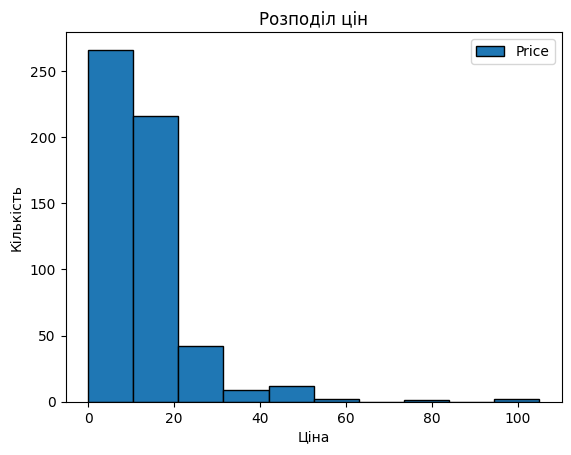

In [38]:
df.plot(kind='hist', y='Price', bins=10, edgecolor='black')

plt.title('Розподіл цін')
plt.xlabel('Ціна')
plt.ylabel('Кількість')

plt.show()

In [16]:
#Визначте, яка ціна у нас максимальна, мінімальна, середня, медіанна (використовуйте функції max, min, mean, median)
max_price = df['Price'].max()
print(max_price)
min_price = df['Price'].min()
print(min_price)
mean_price = df['Price'].mean()
print(mean_price)
median_price = df['Price'].median()
print(median_price)

105
0
13.1
11.0


*   Відповідь: Максимальна ціна - 105
*   Відповідь: Мінімальна ціна - 0
*   Відповідь: Середня ціна - 13.1
*   Відповідь: Медіанна ціна - 11

In [13]:
#Який рейтинг у датасеті найвищий?
max_rating = df['User Rating'].max()
max_rating

4.9

Відповідь: найвищий рейтинг у датасеті - 4.9

In [14]:
#Скільки книг мають такий рейтинг?
books_rating = df[df['User Rating'] == 4.9]
count_books_rating = len(books_rating)
count_books_rating

52

Відповідь: 52 книги

In [12]:
#Яка книга має найбільше відгуків?
max_reviews_book = df.loc[df['Reviews'].idxmax()]
max_reviews_book

Name           Where the Crawdads Sing
Author                     Delia Owens
User Rating                        4.8
Reviews                          87841
Price                               15
Year                              2019
Genre                          Fiction
Name: 534, dtype: object

Відповідь: книга Where the Crawdads Sing має найбільше відгуків

In [22]:
#З тих книг, що потрапили до Топ-50 у 2015 році, яка книга найдорожча?
top_book = df[df['Year'] == 2015].nlargest(50, 'User Rating')
result = top_book.loc[top_book['Price'].idxmax()]
result

Name           Publication Manual of the American Psychologic...
Author                        American Psychological Association
User Rating                                                  4.5
Reviews                                                     8580
Price                                                         46
Year                                                        2015
Genre                                                Non Fiction
Name: 277, dtype: object

Відповідь: книга Publication Manual of the American Psychologic... у топ 50 у 2015 році найдорожча

In [27]:
#Скільки книг жанру Fiction потрапили до Топ-50 у 2010 році?
top_books = df[(df['Genre'] == 'Fiction') & (df['Year'] == 2010)].nlargest(50, 'User Rating')
result = len(top_books)
print(result)

20


Відповідь: 20 книг жанру Fiction потрапили до Топ-50 у 2010 році

In [30]:
#Скільки книг з рейтингом 4.9 потрапило до рейтингу у 2010 та 2011 роках?
books_rating = df[(df['User Rating'] == 4.9) & ((df['Year'] == 2010) | (df['Year'] == 2011))]
result = len(books_rating)
print(result)

1


Відповідь: 1 книга з рейтингом 4.9 потрапило до рейтингу у 2010 та 2011 роках

In [33]:
#Відсортуємо за зростанням ціни всі книги, які потрапили до рейтингу в 2015 році і коштують дешевше за 8 доларів
books = df[(df['Year'] == 2015) & (df['Price'] < 8)]
sorted_books = books.sort_values(by='Price', ascending=True)

sorted_books

,Name,Author,User Rating,Reviews,Price,Year,Genre
507,To Kill a Mockingbird,Harper Lee,4.8,26234,0,2015,Fiction
210,Laugh-Out-Loud Jokes for Kids,Rob Elliott,4.6,6990,4,2015,Non Fiction
206,Knock-Knock Jokes for Kids,Rob Elliott,4.5,3673,4,2015,Non Fiction
111,First 100 Words,Roger Priddy,4.7,17323,4,2015,Non Fiction
123,Giraffes Can't Dance,Giles Andreae,4.8,14038,4,2015,Fiction
54,Creative Haven Creative Cats Coloring Book (Ad...,Marjorie Sarnat,4.8,4022,4,2015,Non Fiction
63,Dear Zoo: A Lift-the-Flap Book,Rod Campbell,4.8,10922,5,2015,Fiction
89,Dover Creative Haven Art Nouveau Animal Design...,Marty Noble,4.6,2134,5,2015,Non Fiction
478,The Very Hungry Caterpillar,Eric Carle,4.9,19546,5,2015,Fiction
201,Killing Reagan: The Violent Assault That Chang...,Bill O'Reilly,4.6,5235,5,2015,Non Fiction


Відповідь: Книга Old School (Diary of a Wimpy Kid #10) остання у відсортованому списку

In [4]:
#Максимальна та мінімальна ціни для жанра Fiction
fiction_price = df[df['Genre'] == 'Fiction']['Price'].agg(['max', 'min'])
fiction_price

max    82
min     0
Name: Price, dtype: int64

In [5]:
#Максимальна та мінімальна ціни для жанра Non Fiction
non_fiction_price = df[df['Genre'] == 'Non Fiction']['Price'].agg(['max', 'min'])
non_fiction_price

max    105
min      0
Name: Price, dtype: int64

*   Відповідь: Максимальна ціна для жанру Fiction - 82
*   Відповідь: Мінімальна ціна для жанру Fiction - 0
*   Відповідь: Максимальна ціна для жанру Non Fiction - 105
*   Відповідь: Мінімальна ціна для жанру Non Fiction - 0


In [6]:
#Новий датафрейм, який вміщатиме кількість книг для кожного з авторів
author_book = df.groupby('Author')['Name'].agg(book_count='count').reset_index()
author_book

,Author,book_count
0,Abraham Verghese,2
1,Adam Gasiewski,1
2,Adam Mansbach,1
3,Adir Levy,1
4,Admiral William H. McRaven,1
...,...,...
243,Walter Isaacson,3
244,William Davis,2
245,William P. Young,2
246,Wizards RPG Team,3


Відповідь: Розмірність таблиці - 248х2

In [7]:
author = author_book.loc[author_book['book_count'].idxmax()]
author

Author        Jeff Kinney
book_count             12
Name: 120, dtype: object

*   Відповідь: Автор Jeff Kinney має найбільше книг
*   Відповідь: 12 книг цього автора

In [25]:
#Датафрейм, який вміщає середній рейтинг для кожного автора
author_avg = df.groupby('Author')['User Rating'].agg(avg_rating='mean').reset_index()
author_avg

,Author,avg_rating
0,Abraham Verghese,4.600000
1,Adam Gasiewski,4.400000
2,Adam Mansbach,4.800000
3,Adir Levy,4.800000
4,Admiral William H. McRaven,4.700000
...,...,...
243,Walter Isaacson,4.566667
244,William Davis,4.400000
245,William P. Young,4.600000
246,Wizards RPG Team,4.800000


In [25]:
author_avg_max = author_avg.loc[author_avg['avg_rating'].idxmin()]
author_avg_max

Author        Donna Tartt
avg_rating            3.9
Name: 71, dtype: object

*   Відповідь: У автора Donna Tartt середній рейтинг мінімальний
*   Відповідь: У цього автора середній рейтинг - 3.9

In [11]:
#З'єднайте останні два датафрейми так, щоб для кожного автора було видно кількість книг та середній рейтинг
new_df = pd.concat([author_book.set_index('Author'), author_avg.set_index('Author')], axis=1).reset_index()
new_df

,Author,book_count,avg_rating
0,Abraham Verghese,2,4.600000
1,Adam Gasiewski,1,4.400000
2,Adam Mansbach,1,4.800000
3,Adir Levy,1,4.800000
4,Admiral William H. McRaven,1,4.700000
...,...,...,...
243,Walter Isaacson,3,4.566667
244,William Davis,2,4.400000
245,William P. Young,2,4.600000
246,Wizards RPG Team,3,4.800000


In [15]:
sorted_new_df = new_df.sort_values(by=['book_count', 'avg_rating'], ascending=[False, True])
sorted_new_df

,Author,book_count,avg_rating
120,Jeff Kinney,12,4.800000
226,Suzanne Collins,11,4.663636
92,Gary Chapman,11,4.736364
197,Rick Riordan,11,4.772727
11,American Psychological Association,10,4.500000
...,...,...,...
123,Jill Twiss,1,4.900000
146,Lin-Manuel Miranda,1,4.900000
173,Nathan W. Pyle,1,4.900000
178,Patrick Thorpe,1,4.900000


Відповідь: Автор Jeff Kinney перший у списку

<ipython-input-29-0f3cfd438759>:7: UserWarning: Glyph 133 (\x85) missing from current font.
  plt.tight_layout()


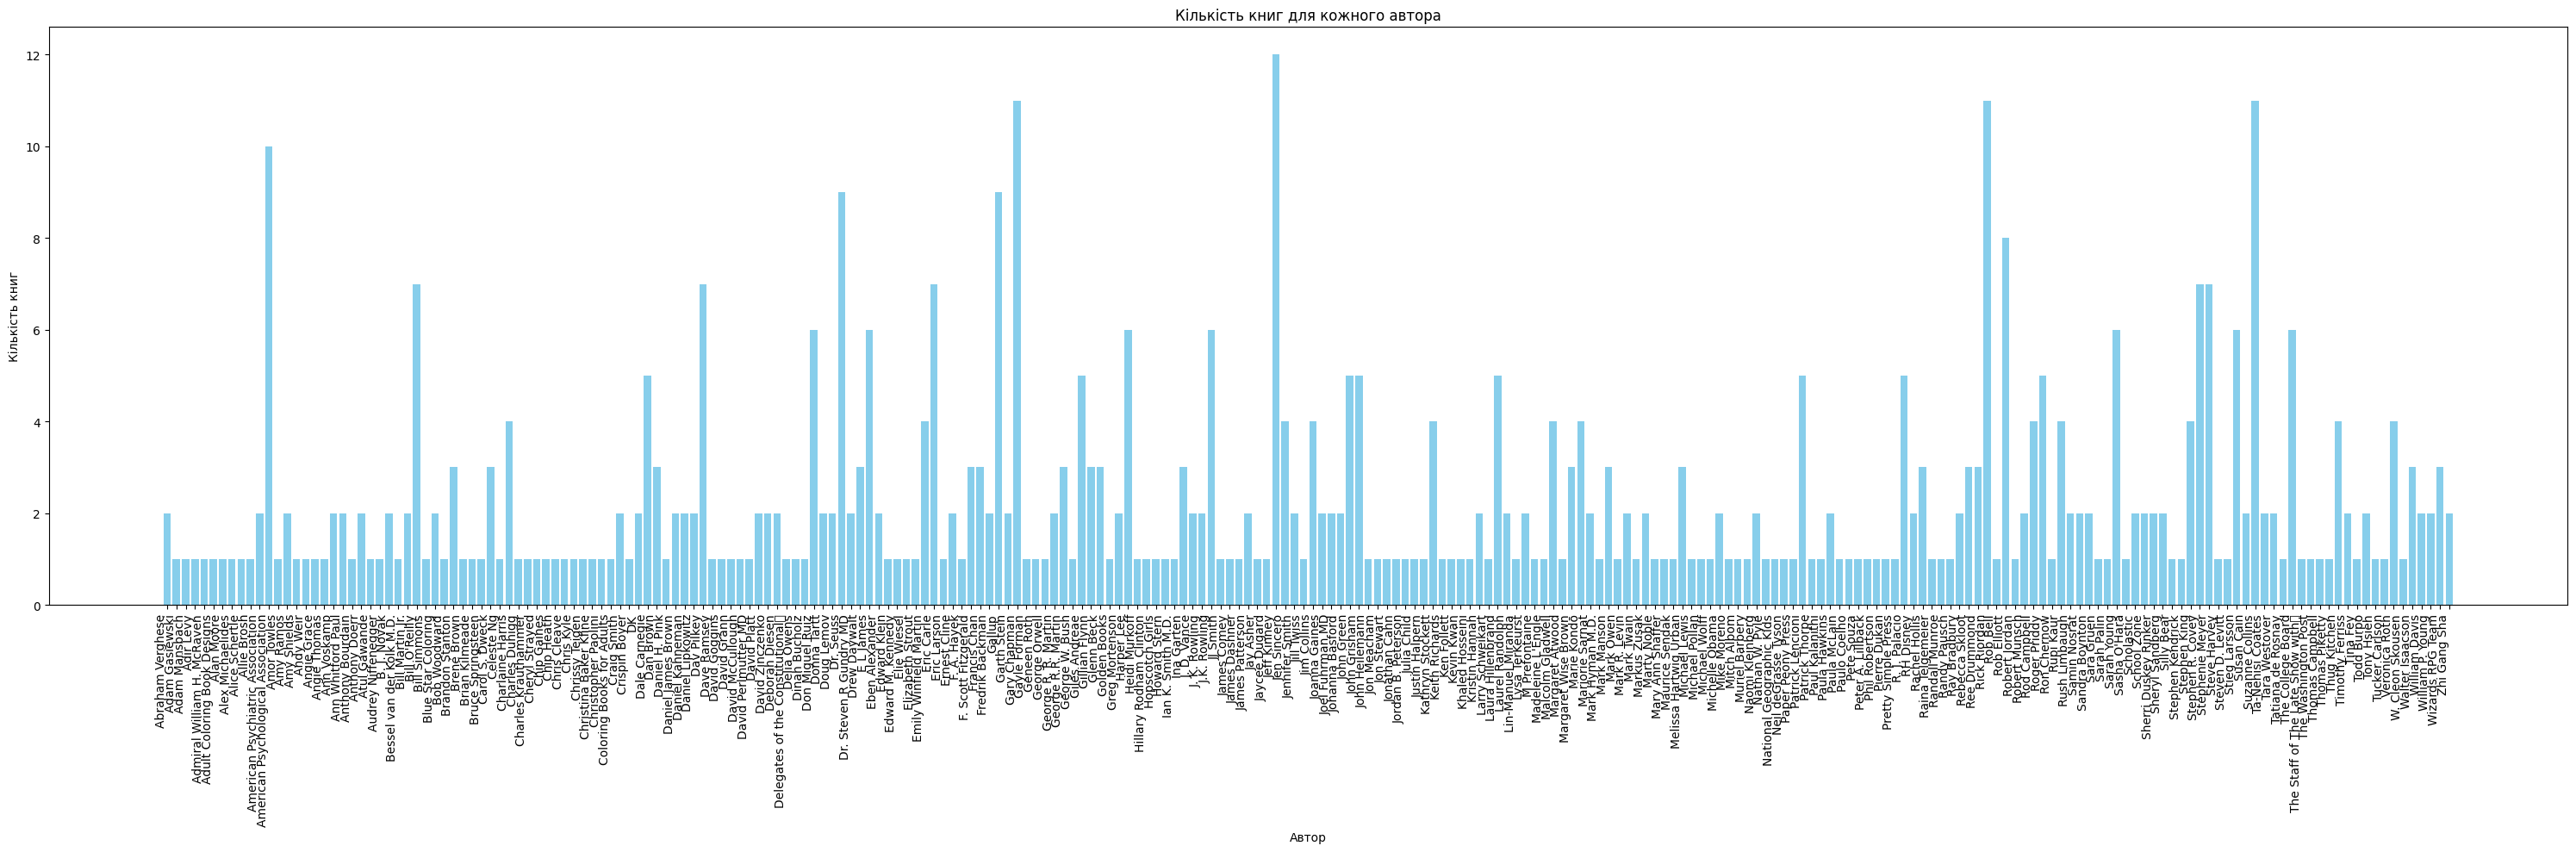

In [29]:
plt.figure(figsize=(30, 10))
plt.bar(author_book['Author'], author_book['book_count'], color='skyblue')
plt.title('Кількість книг для кожного автора')
plt.xlabel('Автор')
plt.ylabel('Кількість книг')
plt.xticks(rotation=90, ha='right')
plt.tight_layout()
plt.show()

<ipython-input-34-5444289c566b>:6: UserWarning: Glyph 133 (\x85) missing from current font.
  plt.tight_layout()


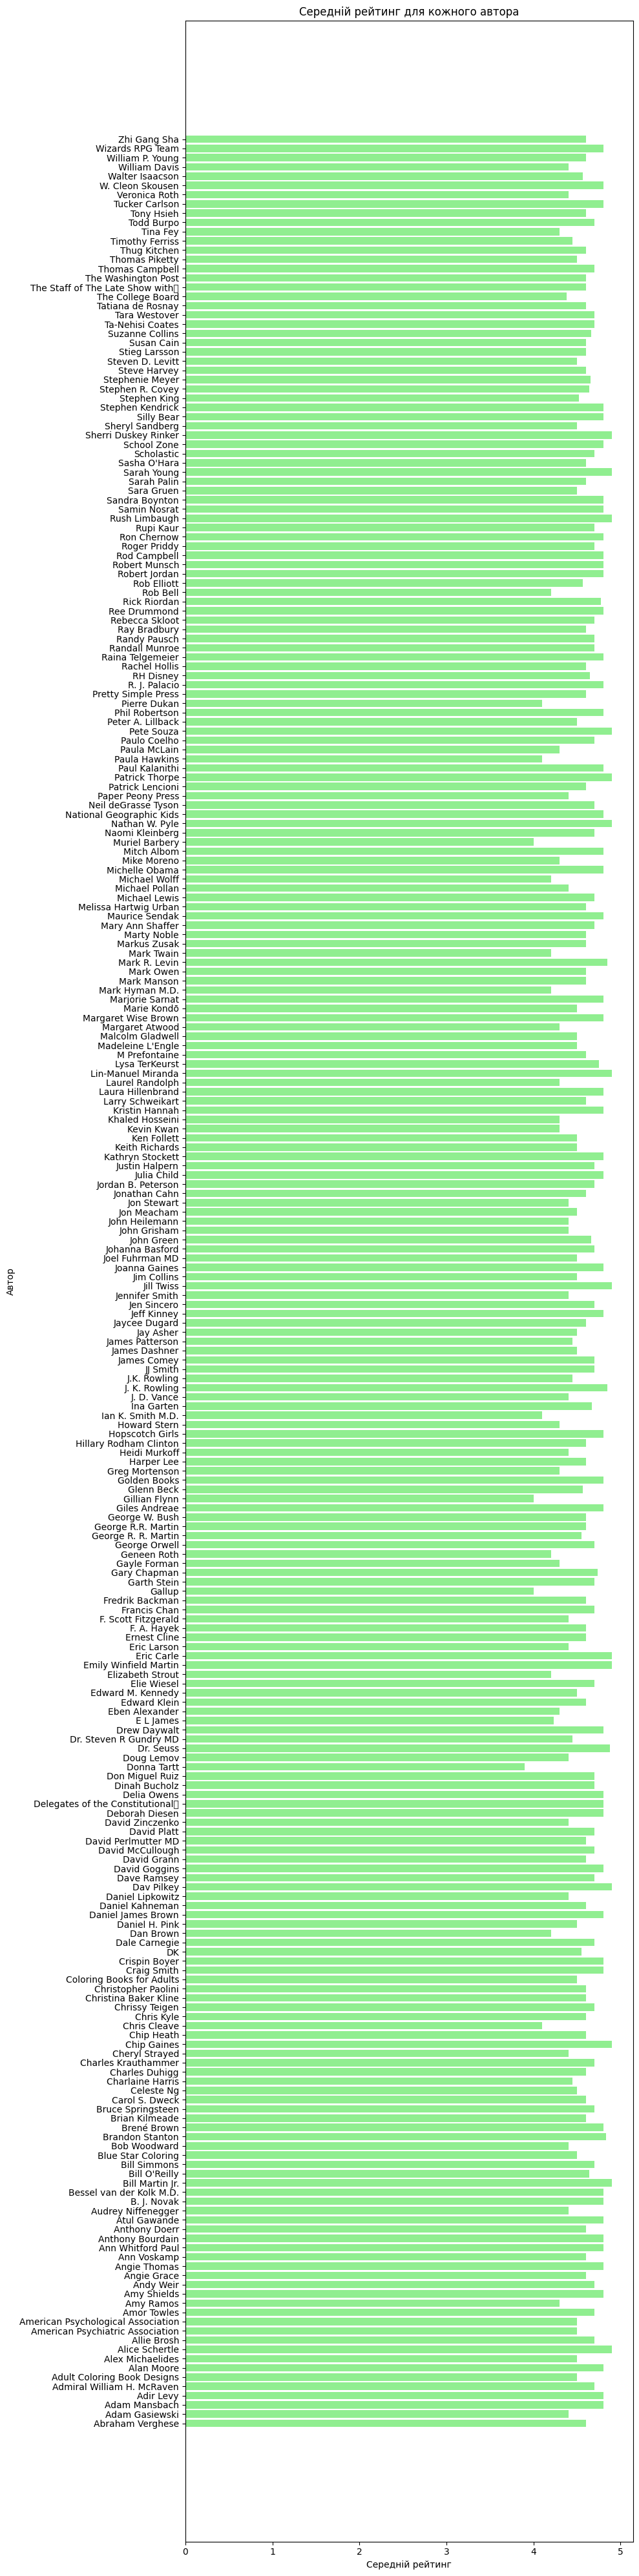

In [34]:
plt.figure(figsize=(10, 40))
plt.barh(author_avg['Author'], author_avg['avg_rating'], color='lightgreen')
plt.title('Середній рейтинг для кожного автора')
plt.xlabel('Середній рейтинг')
plt.ylabel('Автор')
plt.tight_layout()
plt.show()

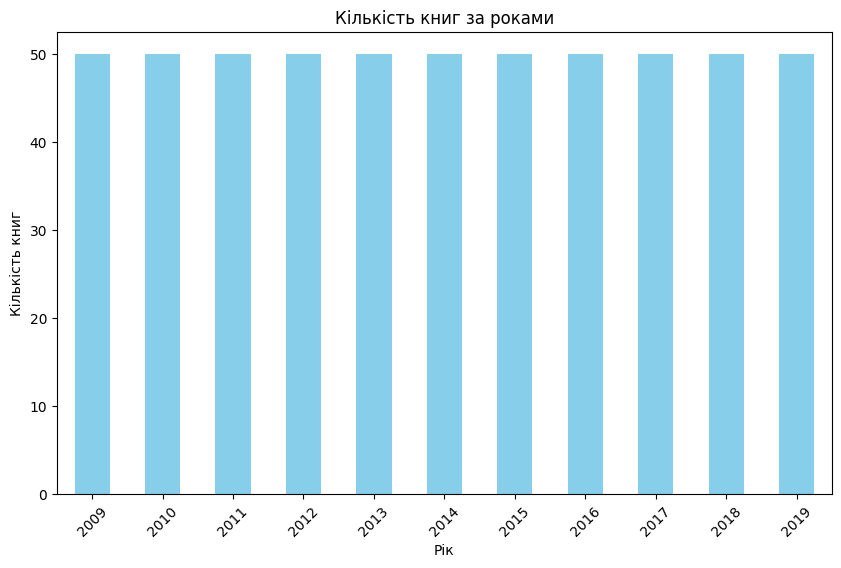

In [64]:
df['Year'] = pd.to_numeric(df['Year'], errors='coerce')
df = df.dropna(subset=['Year'])

books_per_year = df.groupby('Year')['Name'].count()
plt.figure(figsize=(10, 6))
books_per_year.plot(kind='bar', color='skyblue')
plt.title('Кількість книг за роками')
plt.xlabel('Рік')
plt.ylabel('Кількість книг')
plt.xticks(rotation=45)
plt.show()